### Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf 
import tensorflow.keras.datasets as data 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.datasets import cifar10


# https://keras.io/applications/#mobilenet
# https://arxiv.org/pdf/1704.04861.pdf

### Loading dataset

In [2]:
# load and preprocess the data

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32') 

x_train = x_train/255 
x_test = x_test/255 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Data Augmentation

In [3]:
datagen = ImageDataGenerator(rotation_range=30, 
                             horizontal_flip=True, 
                             width_shift_range=0.05, 
                             height_shift_range=0.05,
                             zoom_range=0.1)

train_augmented = datagen.flow(x_train, y_train, batch_size=32)

### Building Model

In [4]:
def build_model(): 
    input_image = Input(shape=(32, 32, 3))

    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    x = base_model.output
    x = Dropout(0.5)(x)
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

### Training

In [5]:
steps = int(x_train.shape[0]/32)
history = model.fit_generator(train_augmented, steps_per_epoch=steps, epochs=100, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1562/1562 [==============================] - 100s 59ms/step - loss: 2.5688 - accuracy: 0.2652 - val_loss: 41.3992 - val_accuracy: 0.1378
Epoch 2/100
1562/1562 [==============================] - 89s 57ms/step - loss: 2.5198 - accuracy: 0.2450 - val_loss: 2.4065 - val_accuracy: 0.1374
Epoch 3/100
1562/1562 [==============================] - 86s 55ms/step - loss: 2.1947 - accuracy: 0.2281 - val_loss: 1.7581 - val_accuracy: 0.3394
Epoch 4/100
1562/1562 [==============================] - 89s 57ms/step - loss: 1.7563 - accuracy: 0.3483 - val_loss: 1.6093 - val_accuracy: 0.4261
Epoch 5/100
1562/1562 [==============================] - 88s 57ms/step - loss: 1.5530 - accuracy: 0.4383 - val_loss: 1.3889 - val_accuracy: 0.5143
Epoch 6/100
1562/1562 [==============================] - 90s 58ms/step - loss: 1.3907 - accuracy: 0.5117 - val_loss: 1.3269 - val_accuracy: 0.5315
Epoch 7/100
1562/1562 [==============================] - 93s 60ms/step - loss: 1.2654 - accuracy: 0.5619 - val_loss:

### Plot loss

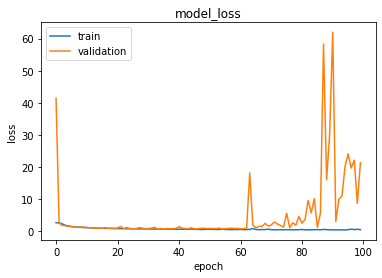

In [6]:
# plotting model loss 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Plot accuracy

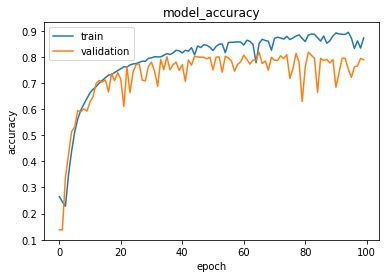

In [7]:
# plotting model accuracy 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Save model

In [8]:
model.save('saved_model/my_model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

In [ ]:
from google.colab import files
files.download("/content/saved_model.zip")